In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'



In [12]:
def show_missing_rate(df: pd.DataFrame):
    missing = pd.DataFrame(df.isnull().sum()).reset_index()
    missing.columns = ['Feature', 'Missing_Percent(%)']
    missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
    print(missing.loc[missing['Missing_Percent(%)']>0,:])

## Drop some column to simplify the question

drop string type data in order to avoid processing natural language and focus on numeric data


## Deal with missing value

In [13]:
import pandas as pd

ori_data = pd.read_csv('./data/US_Accidents_March23.csv')
# ori_data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [14]:
show_missing_rate(ori_data)

                  Feature  Missing_Percent(%)
7                 End_Lat           44.029355
8                 End_Lng           44.029355
10            Description            0.000065
11                 Street            0.140637
12                   City            0.003274
15                Zipcode            0.024779
17               Timezone            0.101030
18           Airport_Code            0.292881
19      Weather_Timestamp            1.555666
20         Temperature(F)            2.120143
21          Wind_Chill(F)           25.865904
22            Humidity(%)            2.253301
23           Pressure(in)            1.820288
24         Visibility(mi)            2.291524
25         Wind_Direction            2.267043
26        Wind_Speed(mph)            7.391355
27      Precipitation(in)           28.512858
28      Weather_Condition            2.244438
42         Sunrise_Sunset            0.300787
43         Civil_Twilight            0.300787
44      Nautical_Twilight         

# Drop the column that has too many missing values 
In order to simplify the problem, also drop the geographical information like latitude and longtitude, street name, zipcode, timezone, country.

Drop Source and Description because those are useless

In [15]:
drop_list = [
    'Source', 'Description', 'End_Lat', 'End_Lng',
    'Zipcode', 'Timezone', 'Airport_Code',
    'Start_Lat', 'Start_Lng', 'Country', 'Precipitation(in)', 'Wind_Chill(F)'
]
ori_data.drop(drop_list,axis=1, inplace=True)
print(f'Total number of columns: {len(ori_data.columns.to_list())}')

Total number of columns: 34


In [16]:
ori_data.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,County,State,Weather_Timestamp,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,Montgomery,OH,2016-02-08 05:58:00,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,Franklin,OH,2016-02-08 05:51:00,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,State Route 32,Williamsburg,Clermont,OH,2016-02-08 06:56:00,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,I-75 S,Dayton,Montgomery,OH,2016-02-08 07:38:00,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,2016-02-08 07:53:00,...,False,False,False,False,True,False,Day,Day,Day,Day


# Accumulate twilight data by 4 kind of twilight source
drop those rows has no four twilight data

In [17]:
#drop those rows has no four twilight data, fortunately the twilight will be 4 null at the same time
#so only choose one column to find out the row has null twilight  will be ok
ori_data.drop(ori_data[ori_data['Nautical_Twilight'].isnull()].index, inplace=True)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
5              Street            0.138764
9   Weather_Timestamp            1.524747
10     Temperature(F)            2.088928
11        Humidity(%)            2.221839
12       Pressure(in)            1.788635
13     Visibility(mi)            2.260255
14     Wind_Direction            2.235012
15    Wind_Speed(mph)            7.374589
16  Weather_Condition            2.213261


## insert a twilight column 1:Day, 0:Night

In [18]:
ori_data.insert(loc=1, column='Twilight', value=[1]*len(ori_data))
ori_data['Twilight'].describe()

count    7705148.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: Twilight, dtype: float64

### Set Day to 1, Night to 0

In [19]:
twilight_list = ['Sunrise_Sunset', 'Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight']
#accumulate the twilight data
for tl in twilight_list:
    ori_data[tl] = ori_data[tl].apply(lambda x: 1 if x == 'Day' else 0)
ori_data.head()

,ID,Twilight,Severity,Start_Time,End_Time,Distance(mi),Street,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,Montgomery,OH,...,False,False,False,False,False,False,0,0,0,0
1,A-2,1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,Franklin,OH,...,False,False,False,False,False,False,0,0,0,1
2,A-3,1,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,State Route 32,Williamsburg,Clermont,OH,...,False,False,False,False,True,False,0,0,1,1
3,A-4,1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,I-75 S,Dayton,Montgomery,OH,...,False,False,False,False,False,False,0,1,1,1
4,A-5,1,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,...,False,False,False,False,True,False,1,1,1,1


# Sum up the value across 4 twilight and ensemble the value in new 'Twilight' column

show original twilight only have value 1 for all rows

In [20]:
ori_data['Twilight'].unique()

array([1])

In [21]:
import random
def set_day_or_night(x):
    if x > 2:
        return 1
    elif x == 2:
        if random.random() > 0.5:
            return 0
        else:
            return 1
    else:
        return 0

    
ori_data['Twilight'] = ori_data[twilight_list].sum(axis=1).apply(set_day_or_night)
ori_data.drop(twilight_list, axis=1, inplace=False).head()

,ID,Twilight,Severity,Start_Time,End_Time,Distance(mi),Street,City,County,State,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,Montgomery,OH,...,False,False,False,False,False,False,False,False,False,False
1,A-2,0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,Franklin,OH,...,False,False,False,False,False,False,False,False,False,False
2,A-3,1,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,State Route 32,Williamsburg,Clermont,OH,...,False,False,False,False,False,False,False,False,True,False
3,A-4,1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,I-75 S,Dayton,Montgomery,OH,...,False,False,False,False,False,False,False,False,False,False
4,A-5,1,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,...,False,False,False,False,False,False,False,False,True,False


# Calculate accident elapse time and insert new column

In [22]:
ori_data['Start_Time']=pd.to_datetime(ori_data['Start_Time'], format='ISO8601')
ori_data['End_Time']=pd.to_datetime(ori_data['End_Time'], format='ISO8601')
ori_data['elapsed_time'] = ori_data['End_Time'] - ori_data['Start_Time']
ori_data['elapsed_time'] = ori_data['elapsed_time']/np.timedelta64(1,'m')
ori_data.head()

,ID,Twilight,Severity,Start_Time,End_Time,Distance(mi),Street,City,County,State,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,A-1,0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,Montgomery,OH,...,False,False,False,False,False,0,0,0,0,314.0
1,A-2,0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,Franklin,OH,...,False,False,False,False,False,0,0,0,1,30.0
2,A-3,1,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,State Route 32,Williamsburg,Clermont,OH,...,False,False,False,True,False,0,0,1,1,30.0
3,A-4,1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,I-75 S,Dayton,Montgomery,OH,...,False,False,False,False,False,0,1,1,1,30.0
4,A-5,1,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,...,False,False,False,True,False,1,1,1,1,30.0


# Sort by timestamp and county and fill in NaN value for those continuous data type
For instance: 'Temperature'

### Fix naming of categorical features

`County`

In [23]:
# remove unnecessary parentheses and 'city'
ori_data['County'] = ori_data['County'].str.replace(r'\(|\)|city', '', case=False, regex=True)
ori_data['County'] = ori_data['County'].str.strip()

### Drop rows that could not be filled by interpolation

keep rows which values of specific features whithin a group is greater or equal to 1

In [24]:
ori_data = ori_data.groupby('County').filter(lambda x: x['Temperature(F)'].notna().sum() >= 1 and x['Humidity(%)'].notna().sum() >= 1 and x['Visibility(mi)'].notna().sum() >= 1 and x['Wind_Speed(mph)'].notna().sum() >= 1 and x['Pressure(in)'].notna().sum() >= 1)

Convert string timestamp to type TimeStampseries for sorting

In [25]:
ori_data.drop(ori_data[ori_data['Weather_Timestamp'].isna()].index, inplace=True)
ori_data['Weather_Timestamp'] = pd.to_datetime(ori_data['Weather_Timestamp'])
ori_data.sort_values('Weather_Timestamp', inplace=True)

In [26]:

def fill_in_missing_value(missing_column: str, ori_data: pd.DataFrame):
    # interpolate missing data and then fill in the rest(usaully start or end of the data)
    ori_data[missing_column] = ori_data.groupby('County')[missing_column].transform(lambda x: x.interpolate(method='nearest').bfill().ffill())
            

In [27]:
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
11     Temperature(F)            0.572912
12        Humidity(%)            0.707857
13       Pressure(in)            0.267979
14     Visibility(mi)            0.745379
15     Wind_Direction            0.721261
16    Wind_Speed(mph)            5.940471
17  Weather_Condition            0.697683


In [28]:
fill_in_missing_value('Temperature(F)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
12        Humidity(%)            0.707857
13       Pressure(in)            0.267979
14     Visibility(mi)            0.745379
15     Wind_Direction            0.721261
16    Wind_Speed(mph)            5.940471
17  Weather_Condition            0.697683


In [29]:
fill_in_missing_value('Humidity(%)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
13       Pressure(in)            0.267979
14     Visibility(mi)            0.745379
15     Wind_Direction            0.721261
16    Wind_Speed(mph)            5.940471
17  Weather_Condition            0.697683


In [30]:
fill_in_missing_value('Visibility(mi)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
13       Pressure(in)            0.267979
15     Wind_Direction            0.721261
16    Wind_Speed(mph)            5.940471
17  Weather_Condition            0.697683


In [31]:
fill_in_missing_value('Wind_Speed(mph)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
13       Pressure(in)            0.267979
15     Wind_Direction            0.721261
17  Weather_Condition            0.697683


In [32]:
fill_in_missing_value('Pressure(in)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
15     Wind_Direction            0.721261
17  Weather_Condition            0.697683


# Handle Wind direction and weather condition

In [33]:
wind_serie = ori_data['Wind_Direction']
ori_data.drop(wind_serie[wind_serie.isnull()].index, inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['Calm'], value='CALM', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['SSW', 'SSE', 'South'], value='S', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['NNW', 'NNE', 'North'], value='N', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['ESE', 'ENE', 'East'], value='E', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['WSW', 'WNW', 'West'], value='W', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['Variable'], value='VAR', inplace=True)
print(ori_data['Wind_Direction'].unique())
show_missing_rate(ori_data)

['N' 'SW' 'CALM' 'W' 'S' 'NW' 'VAR' 'SE' 'E' 'NE']
              Feature  Missing_Percent(%)
6              Street            0.137571
17  Weather_Condition            0.510141


In [34]:
weather_serie = ori_data['Weather_Condition']
ori_data.drop(weather_serie[weather_serie.isnull()].index, inplace=True)
show_missing_rate(ori_data)

  Feature  Missing_Percent(%)
6  Street            0.137903


In [36]:
ori_data.drop(ori_data[ori_data['Street'].isnull()].index, inplace=True)
show_missing_rate(ori_data)

Empty DataFrame
Columns: [Feature, Missing_Percent(%)]
Index: []


In [37]:
ori_data.to_csv('./data/v2.csv')

In [3]:
ori_data = pd.read_csv('./data/v2.csv')

# Data visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ori_data = pd.read_csv('./data/v2.csv')

In [27]:
ori_data.head()

,Unnamed: 0,ID,Twilight,Severity,Start_Time,End_Time,Distance(mi),Street,City,County,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time,Year
0,3571330,A-3581213,0,4,2016-01-14 20:18:33,2017-03-17 22:49:03,0.061,US-22 E,Whitehall,Lehigh,...,False,False,False,False,0,0,0,0,616470.500000,2016
1,3562512,A-3572395,0,4,2016-01-14 20:18:33,2017-02-19 00:38:00,0.061,US-22 E,Whitehall,Lehigh,...,False,False,False,False,0,0,0,0,577699.450000,2016
2,3562358,A-3572241,0,4,2016-01-14 20:18:33,2017-02-17 23:22:00,0.061,US-22 E,Whitehall,Lehigh,...,False,False,False,False,0,0,0,0,576183.450000,2016
3,3548830,A-3558713,0,4,2016-01-14 20:18:33,2017-01-30 13:55:44,0.061,US-22 E,Whitehall,Lehigh,...,False,False,False,False,0,0,0,0,549697.183333,2016
4,3548817,A-3558700,0,4,2016-01-14 20:18:33,2017-01-30 13:34:02,0.061,US-22 E,Whitehall,Lehigh,...,False,False,False,False,0,0,0,0,549675.483333,2016


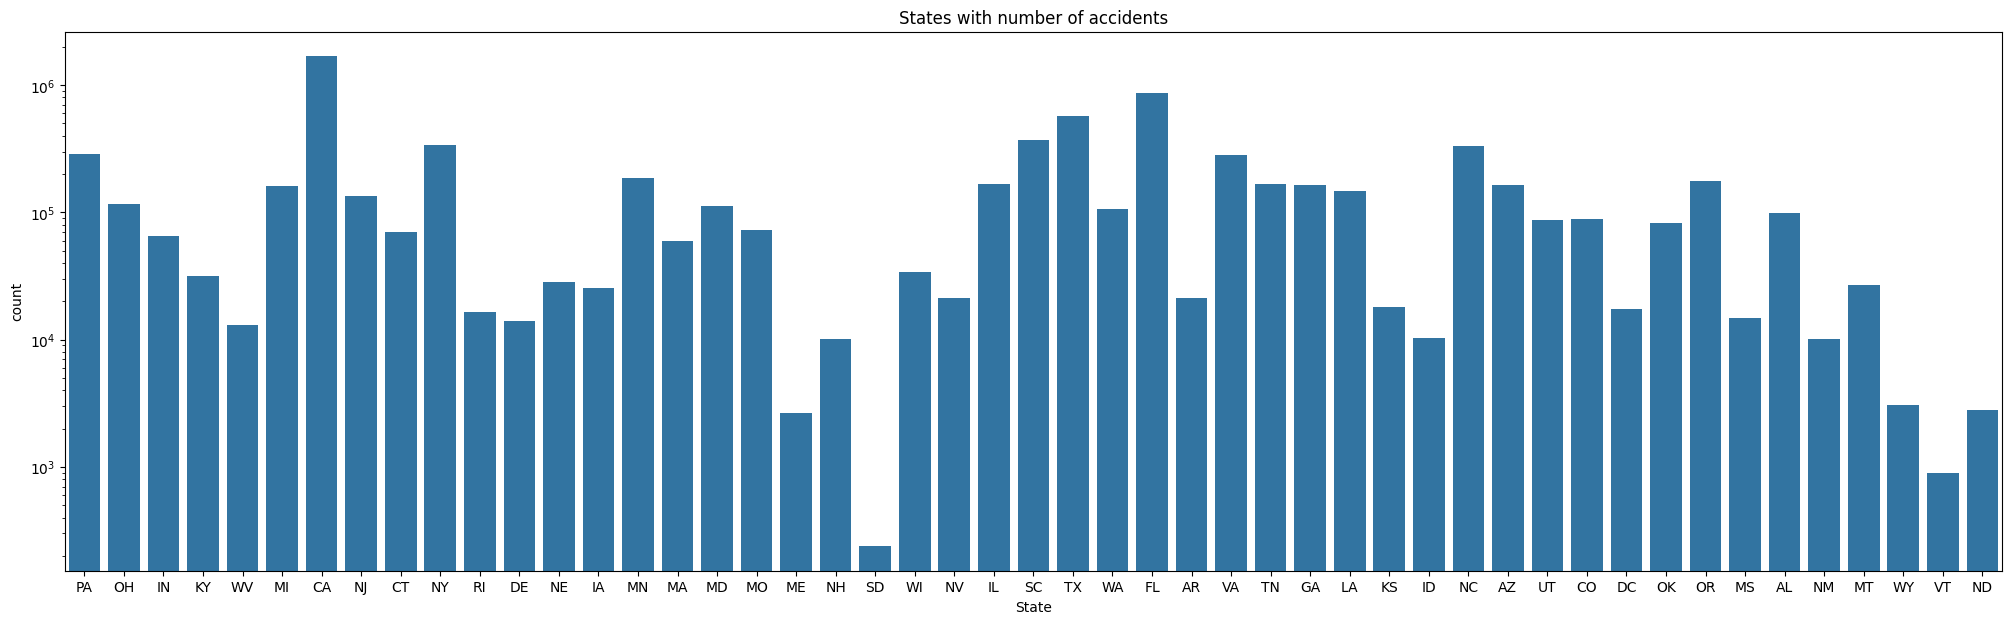

In [14]:
plt.figure(figsize=(25,7))
sns.countplot(x="State",data=ori_data)
plt.yscale("log")
plt.title("States with number of accidents")
plt.show()

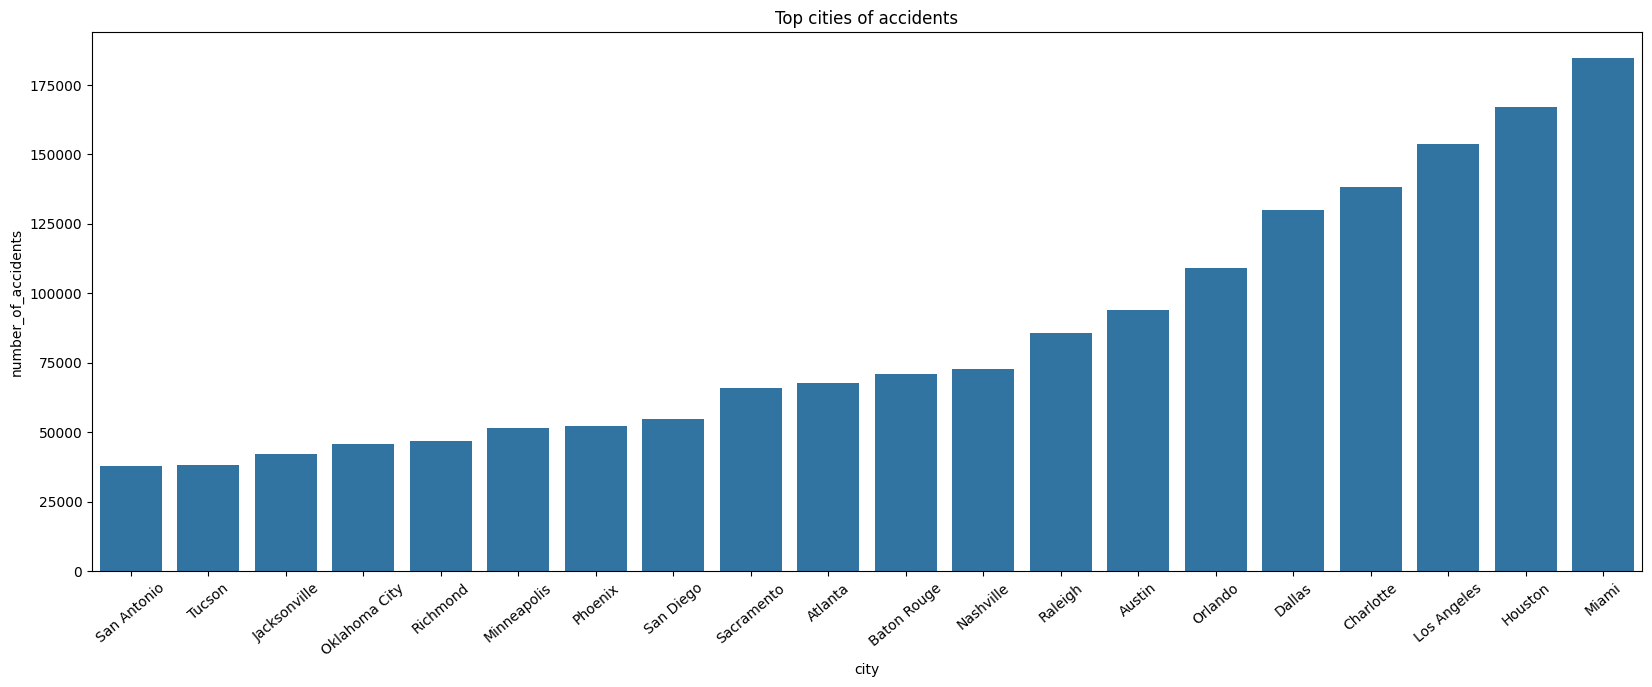

In [15]:
top_cities=ori_data["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]

plt.figure(figsize=(20,7))
sns.barplot(x="city",y="number_of_accidents",data=top_cities)
plt.title("Top cities of accidents")
plt.xticks(rotation=40)
plt.show()

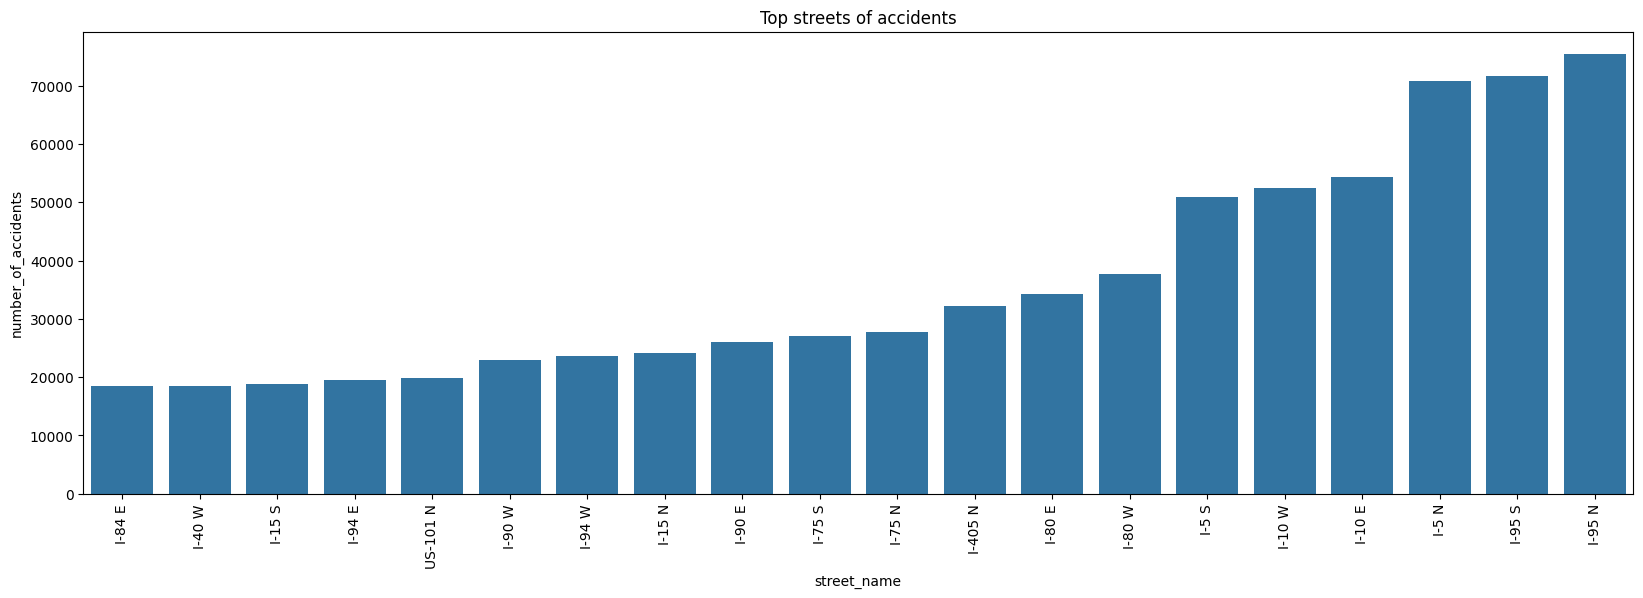

In [16]:
top_streets=ori_data["Street"].value_counts().sort_values()[-20:].reset_index()
top_streets.columns=["street_name","number_of_accidents"]

plt.figure(figsize=(20,6))
sns.barplot(x=top_streets["street_name"],y=top_streets["number_of_accidents"])
plt.xticks(rotation=90)
plt.title("Top streets of accidents")
plt.show()

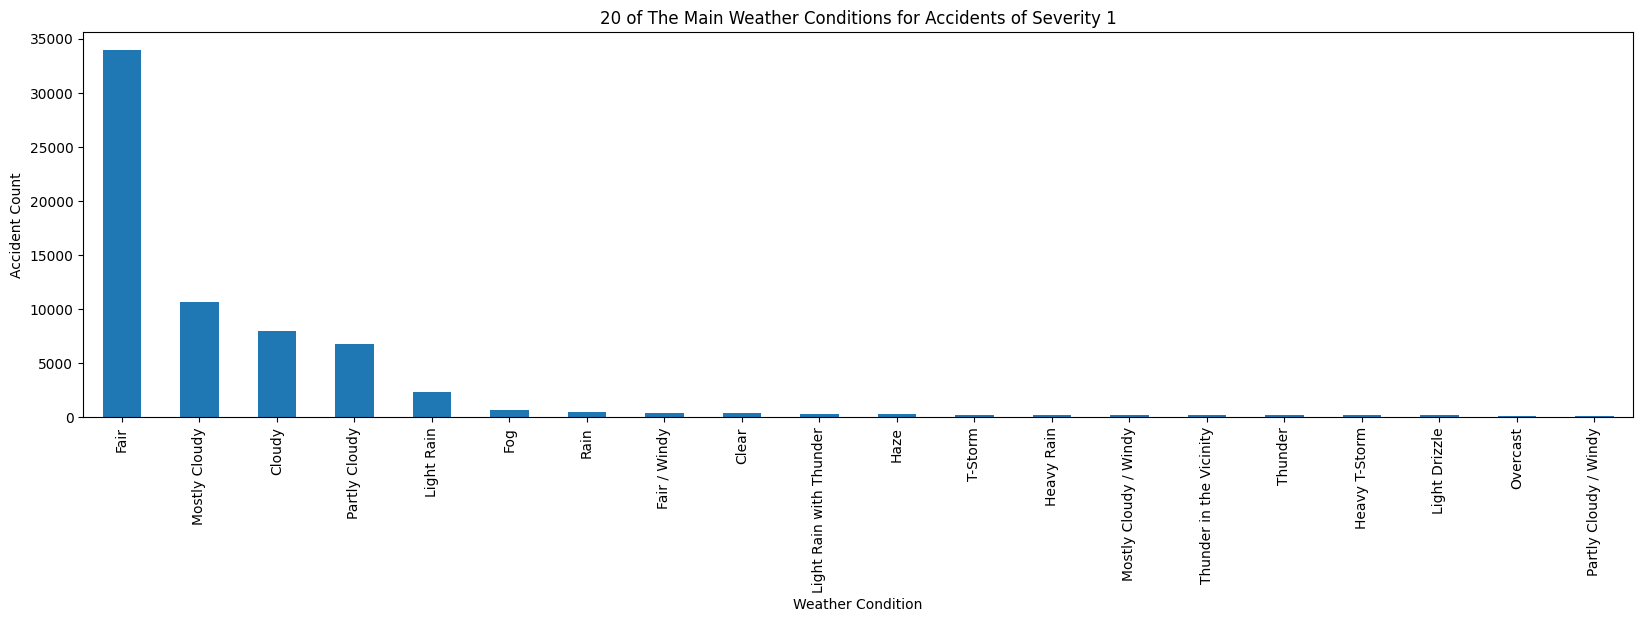

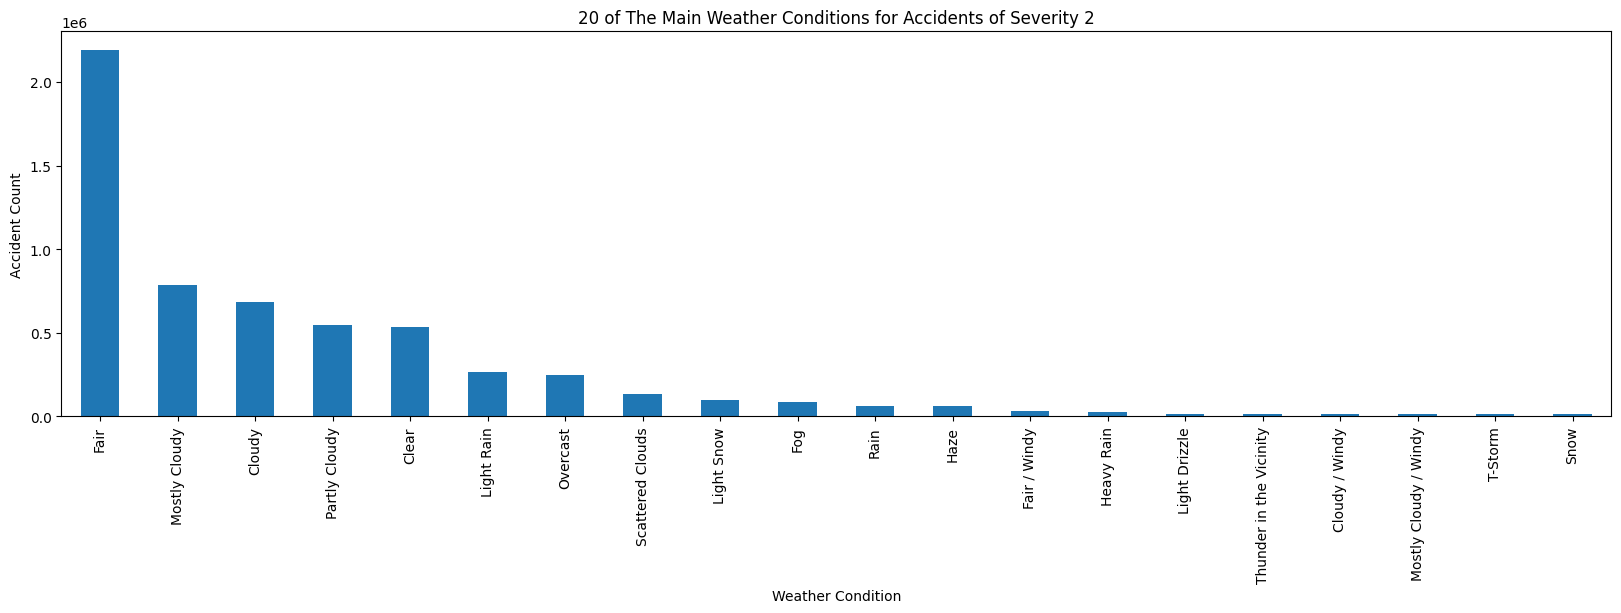

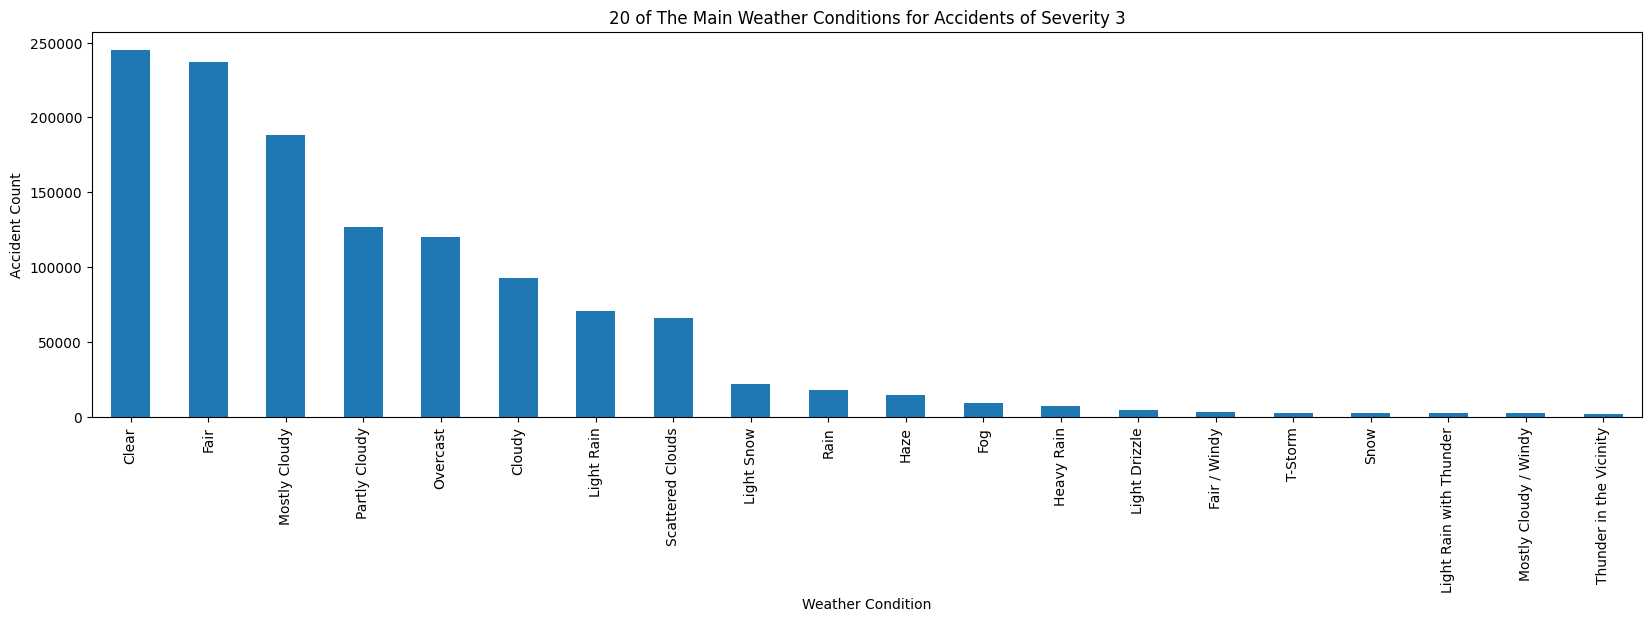

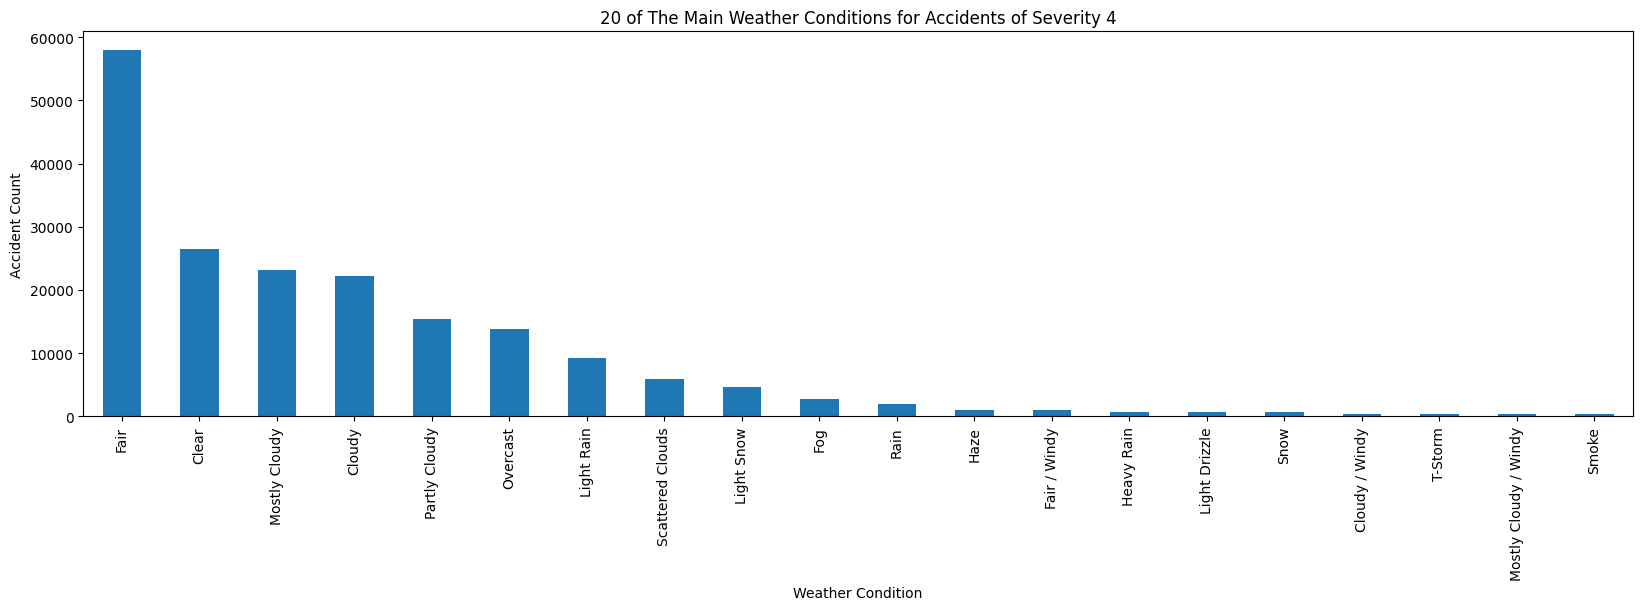

In [18]:
for x in np.arange(1,5):
    plt.subplots(figsize=(20,5))
    ori_data.loc[ori_data["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar()
    plt.xlabel('Weather Condition')
    plt.ylabel('Accident Count')
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x))
    plt.xticks()
    plt.yticks()

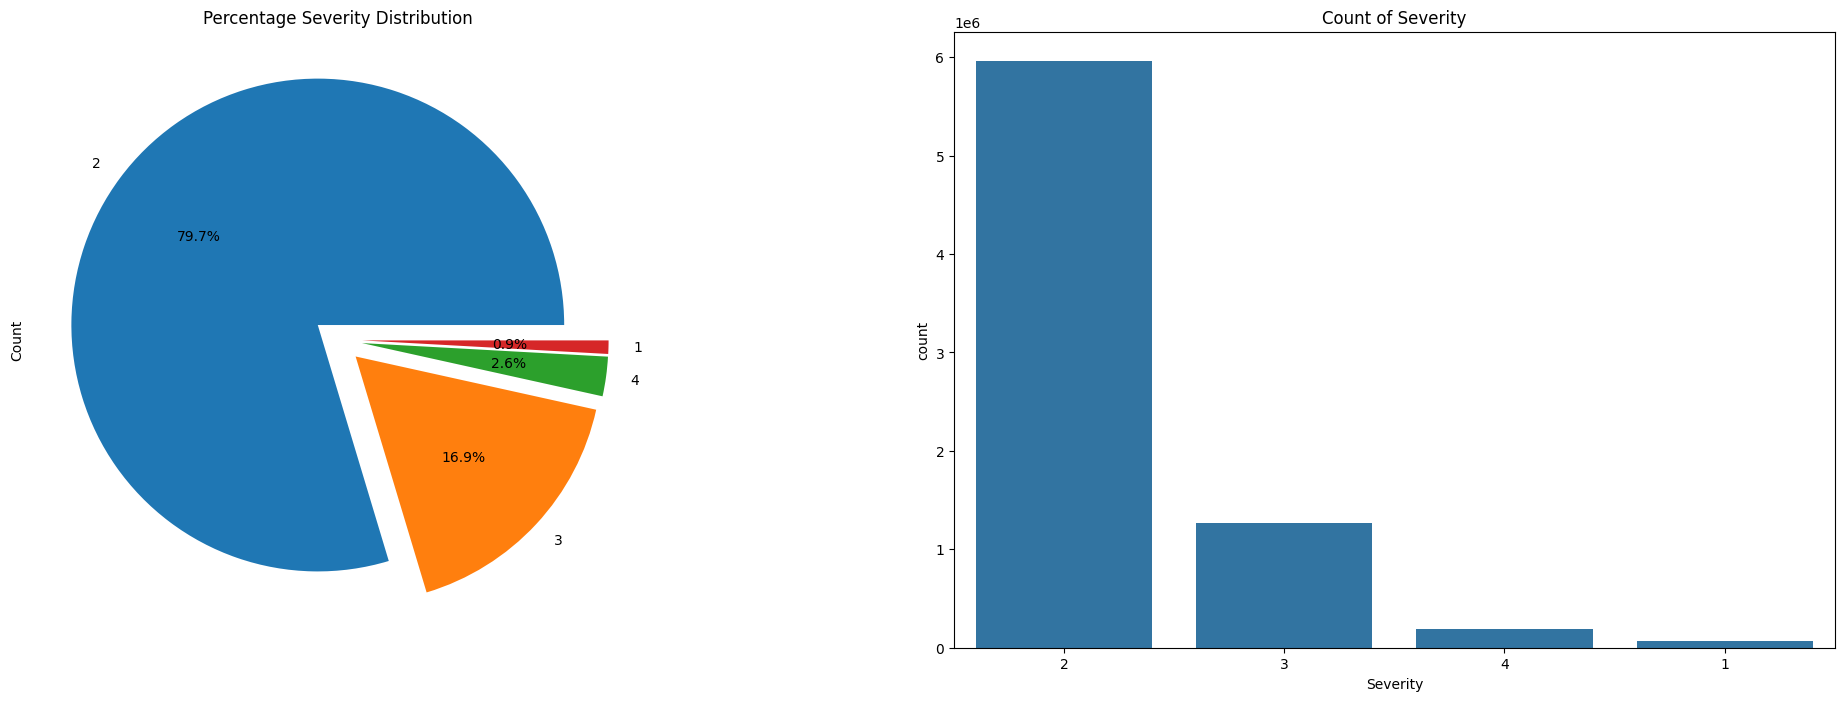

In [19]:
f,ax=plt.subplots(1,2,figsize=(25,8))
ori_data['Severity'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot(x='Severity',data=ori_data,ax=ax[1],order=ori_data['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

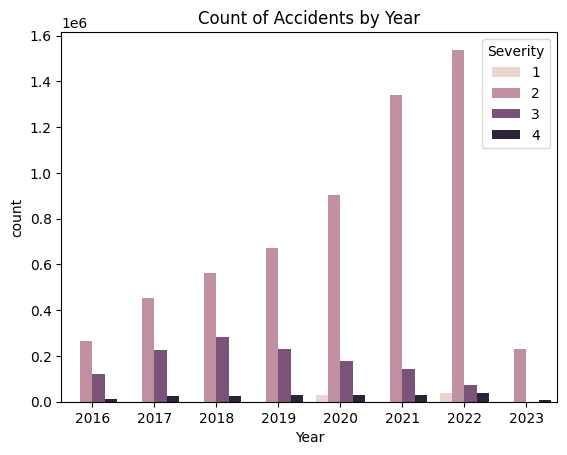

In [23]:
ori_data['Weather_Timestamp'] = pd.to_datetime(ori_data['Weather_Timestamp'])
ori_data['Year'] = ori_data['Weather_Timestamp'].dt.year
sns.countplot(x='Year', data=ori_data, hue='Severity')
plt.title('Count of Accidents by Year')
plt.show()

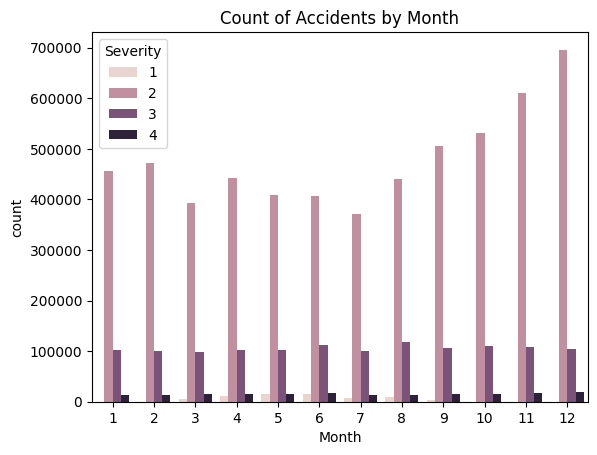

In [26]:
# ori_data['Weather_Timestamp'] = pd.to_datetime(ori_data['Weather_Timestamp'])
filter_data = ori_data[ori_data['Weather_Timestamp'] <= '2023-01-01']
filter_data['Month'] = filter_data['Weather_Timestamp'].dt.month
sns.countplot(x='Month', data=filter_data, hue='Severity')
plt.title('Count of Accidents by Month')
plt.show()

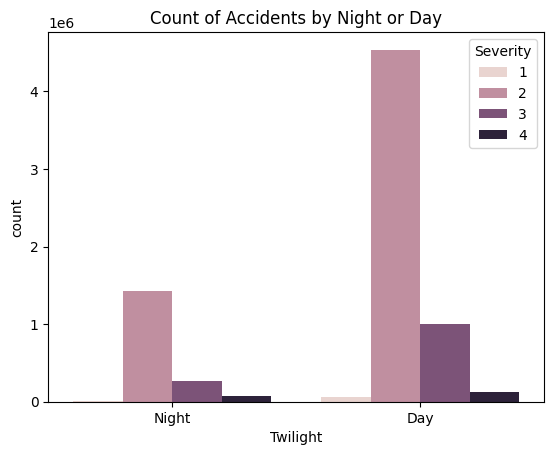

In [31]:
sns.countplot(x='Twilight', data=ori_data, hue='Severity')
plt.xticks([0,1],['Night','Day'])
plt.title('Count of Accidents by Night or Day')
plt.show()

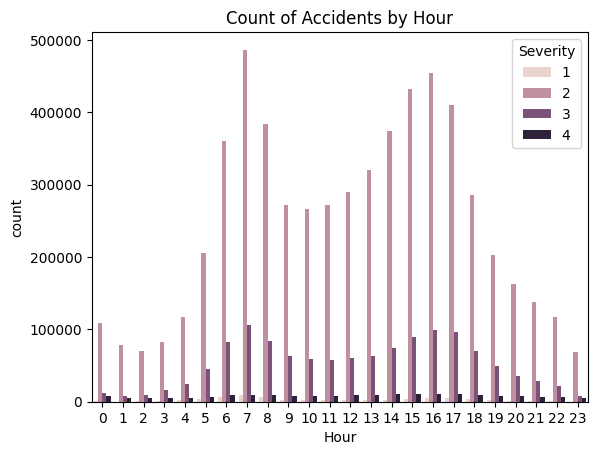

In [32]:
ori_data['Hour'] = ori_data['Weather_Timestamp'].dt.hour
sns.countplot(x='Hour', data=ori_data, hue='Severity')
plt.title('Count of Accidents by Hour')
plt.show()